Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and student id below:

In [1]:
NAME = "63070224"
STUDENT_ID = "Tunlaton Wongchai"

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

# 1 Linear Regression with Regularisation

### 1.1 Import regression-datasets-housing.csv to the memory. The dataset can be downloaded at https://bit.ly/3quO6z8

In [3]:
housing = np.genfromtxt('dataset/regression-datasets-housing.csv', delimiter=',')

### 1.2 Assign values from column 1 to column 13 to X and value from column 14 to y, then convert both variables to numpy.

In [4]:
_X = housing[:, 0:13]
y = housing[:, 13].reshape(-1, 1)
_X.shape, y.shape

((506, 13), (506, 1))

### 1.3 Normalise this data to zero-mean and unit standard deviation

In [5]:
X = (_X - _X.mean(axis=0)) / _X.std(axis=0)

# print(X.mean(axis=0))
# print(X.std(axis=0))

### 1.4 Write a function to calculate a cost function (J) of Linear Regression—Mean Squared Error with regularisation—in the following format:
$$
J = computeCostFunction(X, y, \theta, \lambda)
$$
where $\theta$ is a weight vector and $lambda$ is a regularisation parameter. The function should
automatically concatenate a bias vector into $X$.

In [6]:
def add_bias(X):
    n_samples = len(X)
    return np.hstack((np.ones((n_samples, 1)), X))

def predict(X, theta):
    return np.dot(add_bias(X), theta)

def computeCostFunction(X, y, theta, λ):
    hx = predict(X, theta)
    regularisation = λ * np.sum(theta[1:] ** 2) # do not regularise bias
    return np.mean(np.square(hx - y)) + regularisation # + (regularisation / X.shape[0])

### 1.5 Write a function to find the optimal theta of Linear Regression with Regularisation by using Gradient Descent Algorithm in the following format:
$$
[θ, J_{History}] = gradientDescent(X, y, \theta, \alpha, \lambda, n_{iteration})
$$
where $\alpha$ is a learning rate, $\lambda$ is a regularisation parameter, niteration is the number of iteration, and $J_{History}$ is a vector that store $J$ for every iteration. Noted that bias value should not be regularised.

In [7]:
def gradientDescent(X, y, theta0, alpha, λ, n_iteration, verbose=False):
    j_history = []
    theta = np.copy(theta0)
    n_samples = X.shape[0]

    for i in range(n_iteration):
        prediction = predict(X, theta)
        lambda_vector = np.repeat(λ, add_bias(X).shape[1])
        lambda_vector[0] = 1
        lambda_vector = lambda_vector.reshape(-1 ,1)

        gradient = alpha * (np.dot(add_bias(X).T, prediction-y) + lambda_vector * theta) / n_samples
        theta = theta - gradient

        loss = computeCostFunction(X, y, theta, λ)
        j_history.append(loss)
        if verbose:
            print(f'Iteration: {i} Loss: {loss}')
    theta = theta[:, 0]
    return theta, j_history

def createTheta(X):
    return np.ones((X.shape[1] + 1, 1))

### 1.6 Train a model

The model hyperparameter $\alpha$ = 0.1, $n_{iteration}$ = 1000 and $\lambda$ = [0, 0.01, 0.1, 1, 10]. Plot the convergence curve of each $\lambda$. Then, report the effect of λ on error value. In addition, plot the bar chart of weights of each model.

In [8]:
theta_list = []
labels = []

In [9]:
lambda_list = [0, 0.01, 0.1, 1, 10]

In [10]:
def LinearResgressionPlot(λ):
    theta, j_history = gradientDescent(X, y, createTheta(X), alpha=0.1, λ=λ, n_iteration=1000)
    theta_list.append(theta.flatten())
    labels.append('0')


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
    fig.suptitle(f"λ = {λ}, loss: {j_history[-1]:.2f}")
    ax1.set(xlabel="iterations", ylabel="loss")
    ax1.plot(j_history)

    ax2.bar(range(len(theta)), theta.flatten(), color='green')
    ax2.set(xlabel="theta", ylabel="weight")


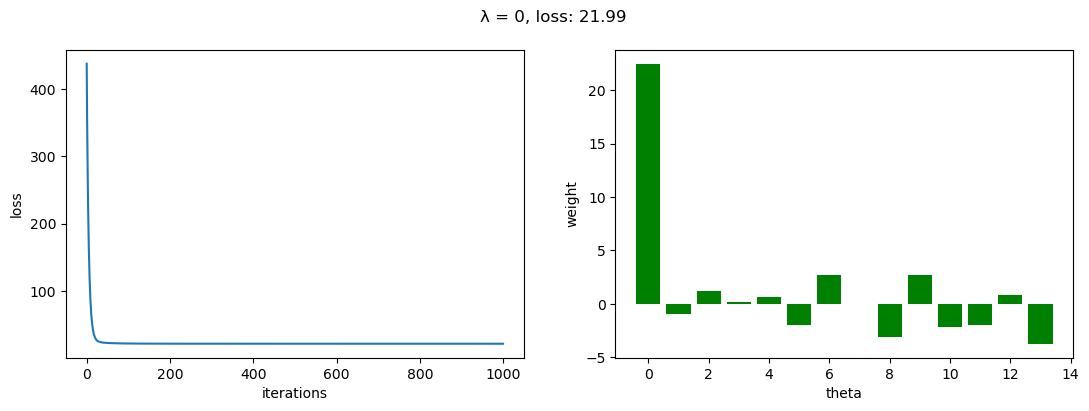

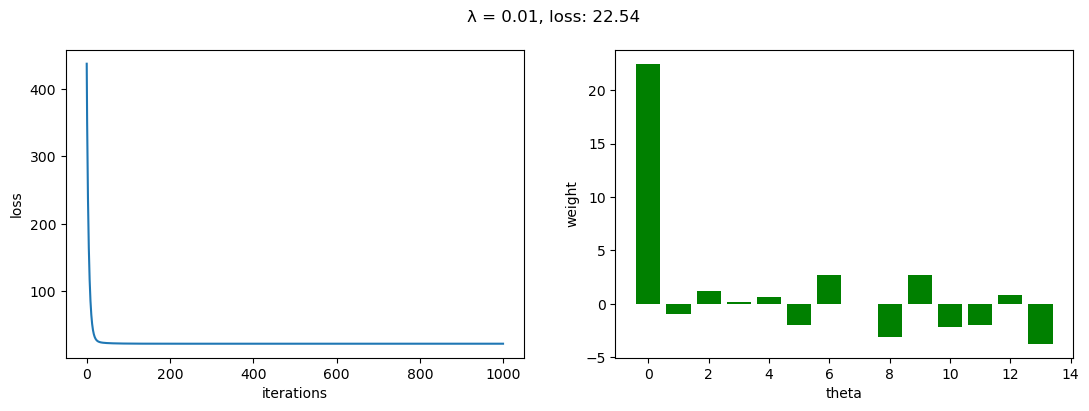

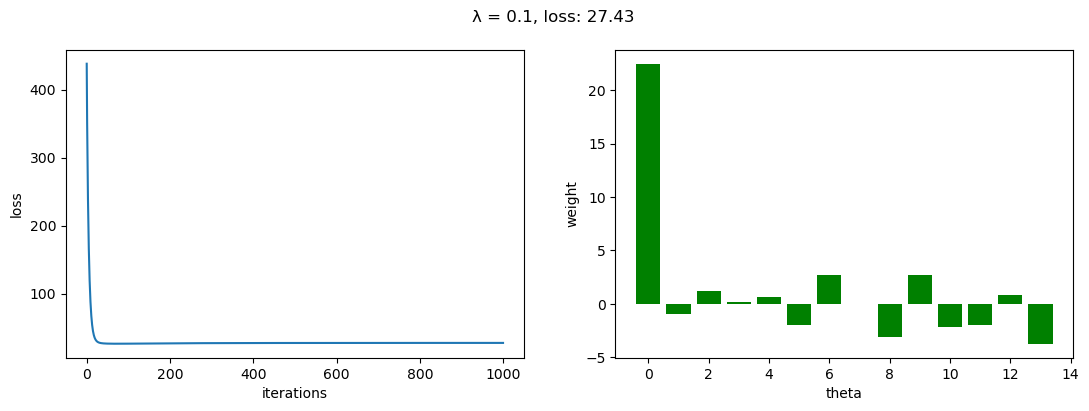

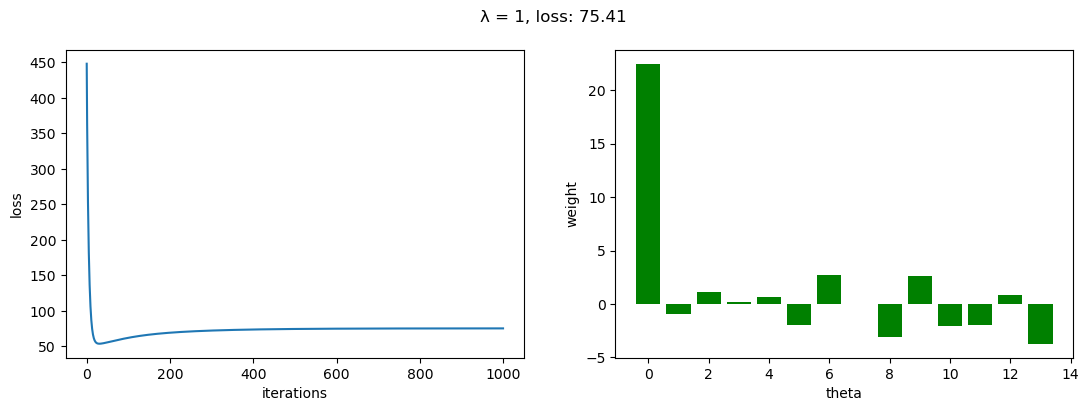

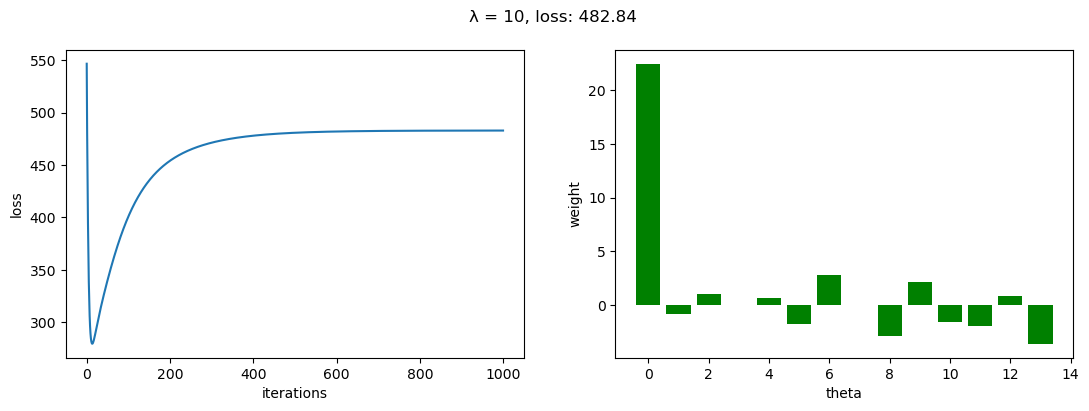

In [11]:
for ld in lambda_list:
    LinearResgressionPlot(λ=ld)

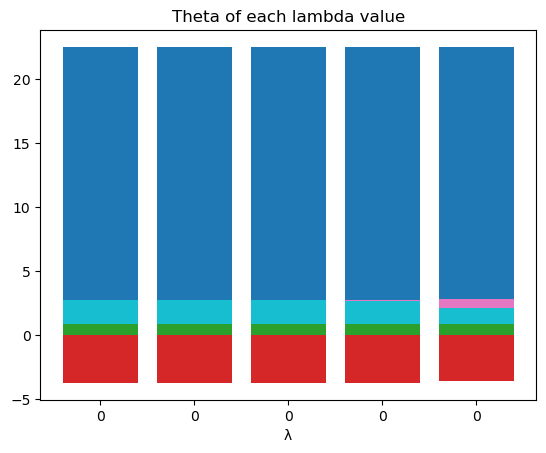

In [12]:
plt.title('Theta of each lambda value')
normailsed_theta_list = theta_list
# normailsed_theta_list = (np.abs(theta_list) - np.min(theta_list, axis=0)) / np.max(theta_list, axis=0)
for i, vals in enumerate(zip(*normailsed_theta_list)):
    indices = np.arange(len(vals))
    plt.bar(indices, vals)

plt.xticks(indices, labels)
plt.xlabel('λ')
plt.show();

What do you observe when you vary the value of λ?

YOUR ANSWER HERE

`เมื่อทำาการ regularisation พบว่า เมื่อค่า lambda เพิ่มขึ้น จะทำให้ค่า loss เพิ่มขึ้น เนื่องจากอาจทำให้ model นี้เกิดการ overfitting ได้ และที่ lambda = 0 หรือไม่มีการทำ regularisation พบว่าค่า loss น้อยที่สุด เนื่องจาก model ตัวนี้ fit กับข้อมูลได้ดีอยู่แล้ว`

# 2 Least Square with Regularisation

### 2.1 Use the same dataset—X and y—obtained from Part 1. Write a function to add a bias vector to X in the following format:
$$
X = addBias(X)
$$

In [13]:
def add_bias(X):
    n_samples = len(X)
    return np.hstack((np.ones((n_samples, 1)), X))

### 2.2 Find the Least-squares solution with regularisation on λ = [0, 0.01, 0.1, 1, 10] by using the following equation:

$$
\hat{\theta} = (X^\intercal X + \lambda \tilde{I})^{-1}X^\intercal y
$$

where $\tilde{I}$ is a manipulated identity matrix. The $\tilde{I}[0,0]$ which corresponds to the bias value
is set to 0 because the bias value will not be regularised. Plot the least-squares estimation of the function for each $\lambda$.

In [14]:
def least_square(X, y, λ):
    m = X.shape[1]
    regularisation = np.identity(m) * λ
    regularisation[0, 0] = 0
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + regularisation), X.T), y)

    return theta

In [15]:
for ld in lambda_list:
    theta = least_square(add_bias(X), y, λ=ld)
    loss = computeCostFunction(X, y, theta, λ=ld)
    print(f'λ = {ld}, loss: {loss:.2f}')

λ = 0, loss: 21.99
λ = 0.01, loss: 22.54
λ = 0.1, loss: 27.43
λ = 1, loss: 75.44
λ = 10, loss: 482.87


Compare and discuss the the results in this Part with Part 1. Should both algorithms achieve the identical solution with the same settings?

`เมื่อใช้วิธีแบบ least-squares ก็พบว่าให้ผลลัพธ์แบบเดียวกับ part1`

# 3 Logistic Regression with Regularisation

### 3.1 Load Iris dataset from sklearn library

In [16]:
iris = sklearn.datasets.load_iris()

### 3.2 Define Petal Length (cm) as X, Label—1 (Setosa) and 0 (Not Setosa)—as y

In [17]:
X = iris.data[:, 2].reshape(-1, 1)
X.shape

(150, 1)

In [18]:
y = (iris.target == 0).astype(np.int32).reshape(-1, 1)
y.shape

(150, 1)

### 3.3 Write a function to calculate a cost function—Binary Cross-entropy with regularisation— in the following format:
$$
J = computeCostFunction(X, y, \theta, \lambda)
$$
where $\theta$ is a weight vector and $\lambda$ is a regularisation parameter. The function should
automatically concatenate a bias vector into $X$.

In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, theta):
    return sigmoid(np.dot(add_bias(X), theta))

def accuracy(y_predicted, y, threshold):
    prediction = y_predicted > threshold
    return np.mean(prediction == y)

In [20]:
def computeCostFunction(X, y, theta, λ):
    hx = predict(X, theta)
    regularisation = (λ * np.sum(theta[1:] ** 2) / (2*X.shape[0]))
    return np.mean(np.square(hx - y)) + regularisation

### 3.4 Write a function to find the optimal weight vector of Logistic Regression with Regularisation by using Gradient Descent Algorithm in the following format:
$$
[\theta, J_{History}] = gradientDescent(X, y, \theta, \alpha, \lambda, n_{iteration})
$$
where $\alpha$ is a learning rate, $n_{iteration}$ is the number of iteration, and $J_{History}$ is a vector that store $J$ for every iteration. Noted that bias value should not be regularised.

In [21]:
def gradientDescent(X, y, theta0, alpha, λ, n_iteration, verbose=False):
    j_history = []
    theta = np.copy(theta0)
    n_samples = X.shape[0]

    for i in range(n_iteration):
        prediction = predict(X, theta)
        gradient = alpha * (np.dot(add_bias(X).T, prediction-y) + λ * theta) / n_samples
        theta = theta - gradient
        loss = computeCostFunction(X, y, theta, λ)
        j_history.append(loss)
        if verbose:
            print(f'Iteration: {i} Loss: {loss}')

    return theta, j_history

### 3.5 Train the model with hyperparameter α = 0.1, niteration = 1000 and λ = [0, 0.01, 0.1, 1, 10]. Plot the convergence curve and decision boundary of each λ and further report the effect of λ on decision boundary and accuracy.

In [22]:
def LogisticResgressionPlot(λ):
    theta, _ = gradientDescent(X, y, createTheta(X), alpha=0.1, λ=λ, n_iteration=1000)

    X_lin = np.linspace(0, 7, 1000).reshape(-1,1)
    y_pred = predict(X_lin, theta)
    decision_boundary = X_lin[y_pred>=0.5][-1]
    acc = accuracy(predict(X, theta), y, threshold=0.5)
    loss = computeCostFunction(X, y, theta, λ)

    plt.figure(figsize=(6,3))
    plt.plot([decision_boundary,decision_boundary], [-0.1,1.1], linewidth=2, label='Decision Boundary')
    y_lin = sigmoid(theta[0]+theta[1]*X_lin)
    plt.plot(X_lin,y_lin)
    plt.plot(add_bias(X)[:, 1:][y==0],y[y==0],'b+',label='not setosa')
    plt.plot(add_bias(X)[:, 1:][y==1],y[y==1],'g+',label='setosa')
    plt.legend()
    plt.title(f"λ = {λ},   accuracy : {acc:.2f},  loss : {loss:.2f}")

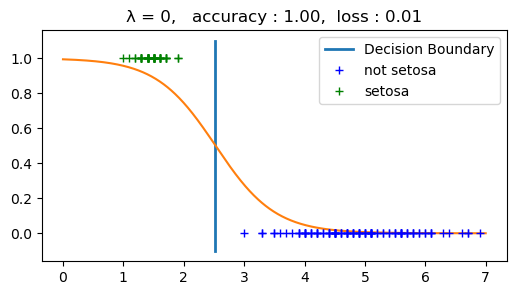

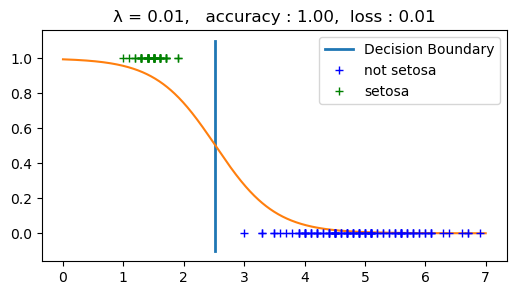

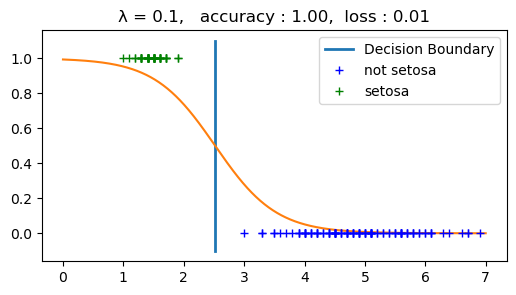

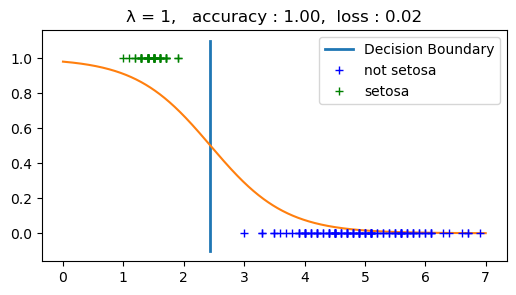

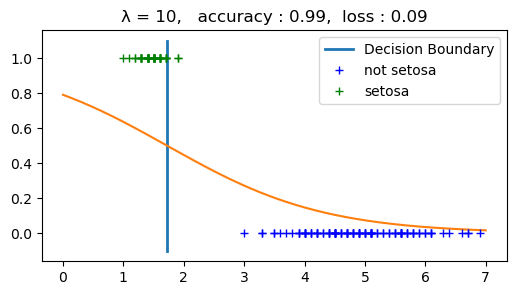

In [23]:
for ld in lambda_list:
    LogisticResgressionPlot(λ=ld)

# 4 m-Fold Cross Validation

### 4.1 Write a function in the following format:

$$
J_m = m\_fold(X, y, \alpha, n_{iteration}, lamda\_list, m)
$$

where $J_m$ is a vector of cost calculated from each fold. (Hint: modify a function from lab manual).

In [24]:
def mfold_cv(X ,y, alpha, n_iteration, lambda_list, m):
    n_samples = X.shape[0]
    fold_size = n_samples // m # define range threshold
    all_loss = []

    for ld in lambda_list:
        fold_loss = []
        print(f"λ = {ld}")
        for i in range(m):
            start, end = i*fold_size, (i+1)*fold_size # define start and end index
            X_test, y_test = X[start:end], y[start:end]
            X_train = np.concatenate((X[:start], X[end:]), axis=0) # complementary of Test
            y_train = np.concatenate((y[:start], y[end:]), axis=0)

            theta, _ = gradientDescent(X_train, y_train, createTheta(X_train), alpha=alpha, λ=ld, n_iteration=n_iteration) # Train model
            loss = computeCostFunction(X_test, y_test, theta, λ=ld) # use optimal theta from above to test with unseen data for each folds
            fold_loss.append(loss)
            print(f"fold: {i+1}, loss: {loss}")
        all_loss.append(fold_loss)
        print(f"Mean of loss : {np.mean(fold_loss)}")
        print("-"*20)
    return all_loss


### 4.2 From Part 3, Train a model with 4-fold cross validation with these hyperparameter
$\alpha$ = 0.1, $n_{iteration}$ = 1000. Observe the effect of cost values for $\lambda$ from [0, 0.01, 0.1, 1, 10] and find which λ can lead a model to the lowest cost value.

In [25]:
cv_loss = mfold_cv(X ,y, 0.01, 1000, lambda_list, 4)

λ = 0
fold: 1, loss: 0.3598591288737744
fold: 2, loss: 0.06807943507903953
fold: 3, loss: 0.023140495233446395
fold: 4, loss: 0.0029770767598877824
Mean of loss : 0.11351403398653703
--------------------
λ = 0.01
fold: 1, loss: 0.36008258068461363
fold: 2, loss: 0.06822044481180099
fold: 3, loss: 0.02324402582428624
fold: 4, loss: 0.0030838643072177087
Mean of loss : 0.11365772890697964
--------------------
λ = 0.1
fold: 1, loss: 0.36208323257415953
fold: 2, loss: 0.06948258340577107
fold: 3, loss: 0.02416923853046735
fold: 4, loss: 0.004037967697641316
Mean of loss : 0.11494325555200982
--------------------
λ = 1
fold: 1, loss: 0.3811025349852611
fold: 2, loss: 0.08144902541870622
fold: 3, loss: 0.03280672588303509
fold: 4, loss: 0.012925649730025478
Mean of loss : 0.12707098400425695
--------------------
λ = 10
fold: 1, loss: 0.5032906918772354
fold: 2, loss: 0.15803365082204351
fold: 3, loss: 0.08126570410035311
fold: 4, loss: 0.06194494568479688
Mean of loss : 0.20113374812110724
-

`ในแต่ละ lambda เมื่อการ 4-fold cross validation พบว่าค่า mean ของ loss ทั้ง 4 folds ที่ lambda = 0 หรือไม่มีการทำ regularisation ให้ค่า loss ที่น้อยที่สุด เพราะว่า model fit กับ data ได้ดีอยู่แล้ว`